# 原始数据

D:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


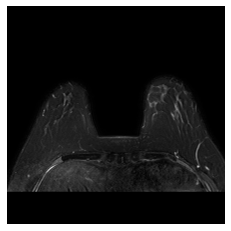

In [1]:
import matplotlib.pyplot as plt
import pydicom
from skimage import exposure
# 读取DICOM文件
path = r"F:\300多的乳腺MR图像\恶性\T2\REN_HAI_XIA-220519157\REN_HAI_XIA_30100000_0009_0009.dcm"
dcm = pydicom.dcmread(path)

# 获取像素数据
image = dcm.pixel_array

# 绘制图像
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# 处理后的图像

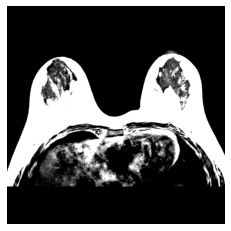

In [2]:
import h5py
import matplotlib.pyplot as plt
file_path = r"F:\325例乳腺癌数据代码\MF\h5py\train\AN_HAI_YING_40100000_0016_0016_15.h5"

with h5py.File(file_path, 'r') as f:
    low_energy_data = f['LOW_ENERGY'][:]
    
    
plt.subplot(1,1,1)
plt.imshow(low_energy_data, cmap='gray')
plt.axis('off')
plt.show()   
    

# 绘制损失图

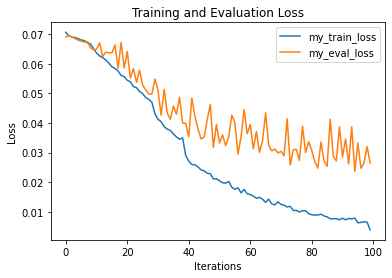

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

# 读取npz文件
folder_path = r'F:\乳腺癌的简介结果数据\Vgg'
data = np.load(os.path.join(folder_path, 'loss.npz'))

# 获取my_train_loss的值
my_train_loss = data['my_train_loss']
#print("my_train_loss:", my_train_loss)

# 获取my_eval_loss的值
my_eval_loss = data['my_eval_loss']
#print("my_eval_loss:", my_eval_loss)




# 绘制my_train_loss和my_eval_loss的图形
plt.plot(my_train_loss, label='my_train_loss')
plt.plot(my_eval_loss, label='my_eval_loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

# 绘制准确率图

max my_train_correct: 0.98518246
max my_eval_correct: 0.9159593


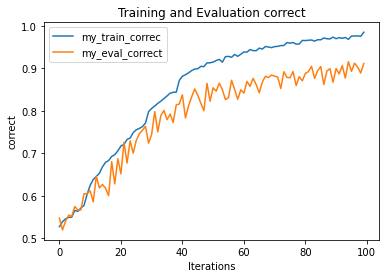

In [4]:
# 获取my_train_correct的值
my_train_correct = data['my_train_correct']
print("max my_train_correct:",max(my_train_correct))

# 获取my_eval_correct的值
my_eval_correct = data['my_eval_correct']
print("max my_eval_correct:",max(my_eval_correct))

# 绘制my_train_loss和my_eval_loss的图形
plt.plot(my_train_correct, label='my_train_correc')
plt.plot(my_eval_correct, label='my_eval_correct')
plt.xlabel('Iterations')
plt.ylabel('correct')
plt.title('Training and Evaluation correct')
plt.legend()
plt.show()

In [5]:
data.close()

# ROC曲线

## Vgg16模型

In [6]:
path= [r"F:\乳腺癌的简介结果数据\Vgg\testdataT2+DCE.csv",
      r"F:\乳腺癌的简介结果数据\Vgg\testdataT2.csv",
      r"F:\乳腺癌的简介结果数据\Vgg\testdataDCE.csv"]

In [7]:
import csv
import numpy as np
def get_column_values(csv_file, column_index):
    values = []
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            values.append(row[column_index:])
    return values


In [8]:
csv_file = path[0]
  # 假设label列在第一列，索引为0
column_values = get_column_values(csv_file, column_index=0)
print(column_values)

[['auc_score', '0.976039752', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', ''

In [9]:
import pandas as pd

# 使用read_csv函数读取CSV文件，不使用第一行作为列名
data = pd.read_csv(path[0], header=None)

# 打印数据的前几行
print(data)

                    0         1         2         3        4         5     \
0              auc_score  0.976040       NaN       NaN      NaN       NaN   
1               Recall_L  0.948800       NaN       NaN      NaN       NaN   
2            Precision_L  0.902500       NaN       NaN      NaN       NaN   
3                  Npv_L  0.934132       NaN       NaN      NaN       NaN   
4                  ppv_l  0.902500       NaN       NaN      NaN       NaN   
5          Specificity_L  0.876405       NaN       NaN      NaN       NaN   
6             F1_score_L  0.925057       NaN       NaN      NaN       NaN   
7     False_alarm_rate_L  0.123596       NaN       NaN      NaN       NaN   
8     Test set: Accuracy  0.915959       NaN       NaN      NaN       NaN   
9   auc_precision_recall  0.981202       NaN       NaN      NaN       NaN   
10                 label  1.000000  1.000000  1.000000  1.00000  1.000000   
11                   pro  0.959308  0.978838  0.998469  0.85119  0.999842   

In [10]:
np.array(column_values[11][1:])

array(['0.95930773', '0.978838205', '0.998469174', ..., '0.999252856',
       '0.995847166', '0.997519672'], dtype='<U11')

In [11]:
np.array(column_values[3])

array(['Npv_L', '0.934131742', '', ..., '', '', ''], dtype='<U11')

In [12]:
label=[]
pro= []
Auc = []
acc = []
recall = []
Specificity = []
Ppv = []
Npv = []
for  t in path:
    column_index = 0  # 假设label列在第一列，索引为0
    column_values = get_column_values(t, column_index)
    label_= np.array(column_values[10][1:], dtype=np.float64)
    pro_= np.array(column_values[11][1:], dtype=np.float64)
    auc_ = np.array(column_values[0][1], dtype=np.float64)
    acc_ = np.array(column_values[8][1], dtype=np.float64)
    recall_ = np.array(column_values[1][1])
    Specificity_ = np.array(column_values[5][1], dtype=np.float64)
    Ppv_ = np.array(column_values[4][1])
    Npv_ = np.array(column_values[3][1], dtype=np.float64)

    label.append(label_)
    pro.append(pro_)
    Auc.append(auc_)
    acc.append(acc_)
    recall.append(recall_)
    Specificity.append(Specificity_)
    Ppv.append(Ppv_)
    Npv.append(Npv_)


In [13]:
label_T2_DCE=label[0]
label_T2=label[1]
label_DCE=label[2]
pro_T2_DCE=pro[0]
pro_T2=pro[1]
pro_DCE=pro[2]
auc_T2_DCE = Auc[0]
auc_T2  = Auc[1]
auc_DCE = Auc[2]
acc_T2_DCE = acc[0]
acc_T2  = acc[1]
acc_DCE = acc[2]
recall_T2_DCE = recall[0]
recall_T2  = recall[1]
recall_DCE = recall[2]
Specificity_T2_DCE = Specificity[0]
Specificity_T2  = Specificity[1]
Specificity_DCE = Specificity[2]
Ppv_T2_DCE = Ppv[0]
Ppv_T2  = Ppv[1]
Ppv_DCE = Ppv[2]
Npv_T2_DCE = Npv[0]
Npv_T2  = Npv[1]
Npv_DCE = Npv[2]

In [14]:
len(label_T2)

3534

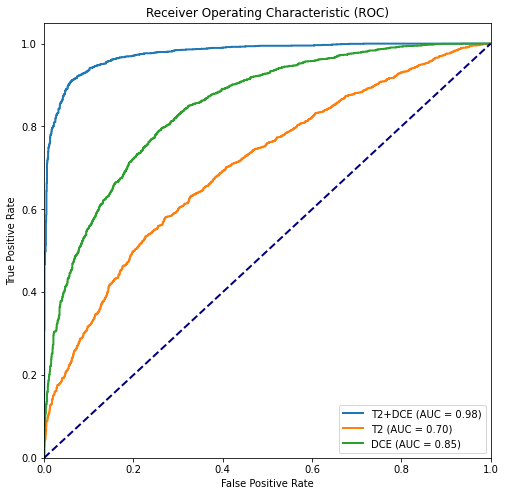

In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
 
# 生成七组概率和标签数据
probabilities = [
    pro_T2_DCE,
    pro_T2,
    pro_DCE
]
 
labels = [
    label_T2_DCE,
    label_T2,
    label_DCE,
]
 
labels_name =['T2+DCE','T2','DCE']
 
# 绘制AUC曲线
plt.figure(figsize=(8, 8))
 
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(labels[i], probabilities[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{labels_name[i]} (AUC = {roc_auc:.2f})')
 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## 95%Cl的计算

In [16]:
auc_T2_DCE

array(0.97603975)

In [17]:
T1_T2_E_label=label_T2_DCE
T1_T2_E_label.sum()

1932.0

In [18]:
len(T1_T2_E_label)-T1_T2_E_label.sum()

1602.0

In [19]:
list(T1_T2_E_label).count(1)

1932

In [20]:
import  math

def confidence_level(auc_value ,positive_samples ,negative_samples):
    # 置信水平
    confidence_level = 0.95
    Q1 = auc_value / (2 - auc_value)
    Q2 = (2 * auc_value ** 2) / (1 + auc_value)
    # 计算标准误差
    standard_error = math.sqrt((auc_value * (1 - auc_value) +
                                (positive_samples - 1) * (Q1 - auc_value ** 2) +
                                (negative_samples - 1) * (Q2 - auc_value ** 2))
                               / (positive_samples * negative_samples))

    # 根据置信水平计算Z分数
    z_score = 1.96  # 对于95%置信水平

    # 计算百分之九十五的置信区间
    lower_bound = auc_value - z_score * standard_error
    upper_bound = auc_value + z_score * standard_error

    print(f"95% Confidence Interval for AUC: {lower_bound:.2f} - {upper_bound:.2f}")

### AUC的95%Cl

In [21]:
print('='*10,'95% Confidence Interval for AUC of test model','='*10)
#融合模型
T2_DCE_auc_score= auc_T2_DCE
T2_DCE_label=label_T2_DCE
print(f'两个融合模型：{T2_DCE_auc_score:.2f}')
confidence_level(T2_DCE_auc_score,list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))
# 都是T2
T2_auc_score= auc_T2
print(f'都是T2：{T2_auc_score:.2f}')
confidence_level(T2_auc_score,list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))
# 都是DCE
DCE_auc_score= auc_DCE
print(f'都是DCE：{DCE_auc_score:.2f}')
confidence_level(DCE_auc_score,list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))

========== 95% Confidence Interval for AUC of test model ==========
两个融合模型：0.98
95% Confidence Interval for AUC: 0.97 - 0.98
都是T2：0.70
95% Confidence Interval for AUC: 0.69 - 0.72
都是DCE：0.85
95% Confidence Interval for AUC: 0.83 - 0.86


### ACC的95%Cl

In [22]:
acc_T2_DCE

array(0.9159593)

In [23]:
for b,i in enumerate(acc):
    print('='*20)
    print(f"{labels_name[b]} {float(i.item()):.2f}")
    confidence_level(float(acc[b].item()),list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))

T2+DCE 0.92
95% Confidence Interval for AUC: 0.91 - 0.93
T2 0.63
95% Confidence Interval for AUC: 0.61 - 0.65
DCE 0.75
95% Confidence Interval for AUC: 0.74 - 0.77


In [24]:
for i in acc:
    print('='*20)
    print(f'Accuracy：{i:.2f}')
    confidence_level(i,list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))

Accuracy：0.92
95% Confidence Interval for AUC: 0.91 - 0.93
Accuracy：0.63
95% Confidence Interval for AUC: 0.61 - 0.65
Accuracy：0.75
95% Confidence Interval for AUC: 0.74 - 0.77


### 计算recall/sensity

In [25]:
recall[0]

array('0.9488', dtype='<U6')

In [26]:
float(recall[0].item())

0.9488

In [27]:

for b,i in enumerate(recall):
    print('='*20)

    print(f"{labels_name[b]}  recall： {float(i.item()):.2f}")
    confidence_level(float(recall[b].item()),list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))

T2+DCE  recall： 0.95
95% Confidence Interval for AUC: 0.94 - 0.96
T2  recall： 0.83
95% Confidence Interval for AUC: 0.82 - 0.84
DCE  recall： 0.90
95% Confidence Interval for AUC: 0.89 - 0.91


### 计算Specificity

In [28]:
for b,i in enumerate(Specificity):
    print('='*20)
    print(f"{labels_name[b]} {float(i.item()):.2f}")
    confidence_level(float(Specificity[b].item()),list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))

T2+DCE 0.88
95% Confidence Interval for AUC: 0.86 - 0.89
T2 0.39
95% Confidence Interval for AUC: 0.38 - 0.41
DCE 0.58
95% Confidence Interval for AUC: 0.56 - 0.60


### 计算Ppv


In [29]:
for b,i in enumerate(Ppv):
    print('='*20)
    print(f"{labels_name[b]} {float(i.item()):.2f}")
    confidence_level(float(Ppv[b].item()),list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))

T2+DCE 0.90
95% Confidence Interval for AUC: 0.89 - 0.91
T2 0.62
95% Confidence Interval for AUC: 0.60 - 0.64
DCE 0.72
95% Confidence Interval for AUC: 0.70 - 0.74


### 计算Npv

In [30]:
for b,i in enumerate(Npv):
    print('='*20)
    print(f"{labels_name[b]} {float(i.item()):.2f}")
    confidence_level(float(Npv[b].item()),list(T2_DCE_label).count(0) ,list(T2_DCE_label).count(1))

T2+DCE 0.93
95% Confidence Interval for AUC: 0.93 - 0.94
T2 0.66
95% Confidence Interval for AUC: 0.64 - 0.68
DCE 0.83
95% Confidence Interval for AUC: 0.81 - 0.84


In [31]:
import pandas as pd

# 使用read_csv函数读取CSV文件，不使用第一行作为列名
data = pd.read_csv(r"F:\乳腺癌的简介结果数据\Resnet\testdataT2+DCE.csv", header=None)

# 打印数据的前几行
print(data)

                    0         1        2         3         4        5     \
0              auc_score  0.975046      NaN       NaN       NaN      NaN   
1               Recall_L  0.926000      NaN       NaN       NaN      NaN   
2            Precision_L  0.934200      NaN       NaN       NaN      NaN   
3                  Npv_L  0.911674      NaN       NaN       NaN      NaN   
4                  ppv_l  0.934200      NaN       NaN       NaN      NaN   
5          Specificity_L  0.921348      NaN       NaN       NaN      NaN   
6             F1_score_L  0.930075      NaN       NaN       NaN      NaN   
7     False_alarm_rate_L  0.078652      NaN       NaN       NaN      NaN   
8     Test set: Accuracy  0.923882      NaN       NaN       NaN      NaN   
9   auc_precision_recall  0.978944      NaN       NaN       NaN      NaN   
10                 label  1.000000  1.00000  1.000000  1.000000  1.00000   
11                   pro  0.999825  0.98945  0.996662  0.999965  0.99999   

       6   

# Resnet18模型

## 损失图的绘制

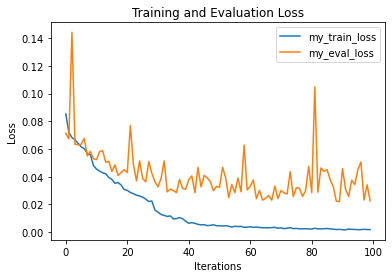

In [32]:
import numpy as np
import os
import matplotlib.pyplot as plt

# 读取npz文件
folder_path = r'F:\300多例乳腺癌实验结果\乳腺癌的简介结果数据\Resnet'
data = np.load(os.path.join(folder_path, 'loss.npz'))

# 获取my_train_loss的值
my_train_loss = data['my_train_loss']
#print("my_train_loss:", my_train_loss)

# 获取my_eval_loss的值
my_eval_loss = data['my_eval_loss']
#print("my_eval_loss:", my_eval_loss)




# 绘制my_train_loss和my_eval_loss的图形
plt.plot(my_train_loss, label='my_train_loss')
plt.plot(my_eval_loss, label='my_eval_loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Training and Evaluation Loss')
plt.legend()
plt.show()

## 准确率的绘制

max my_train_correct: 0.9949792
max my_eval_correct: 0.9238823


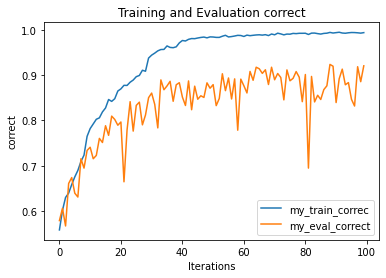

In [33]:
# 获取my_train_correct的值
my_train_correct = data['my_train_correct']
print("max my_train_correct:",max(my_train_correct))

# 获取my_eval_correct的值
my_eval_correct = data['my_eval_correct']
print("max my_eval_correct:",max(my_eval_correct))

# 绘制my_train_loss和my_eval_loss的图形
plt.plot(my_train_correct, label='my_train_correc')
plt.plot(my_eval_correct, label='my_eval_correct')
plt.xlabel('Iterations')
plt.ylabel('correct')
plt.title('Training and Evaluation correct')
plt.legend()
plt.show()
data.close()

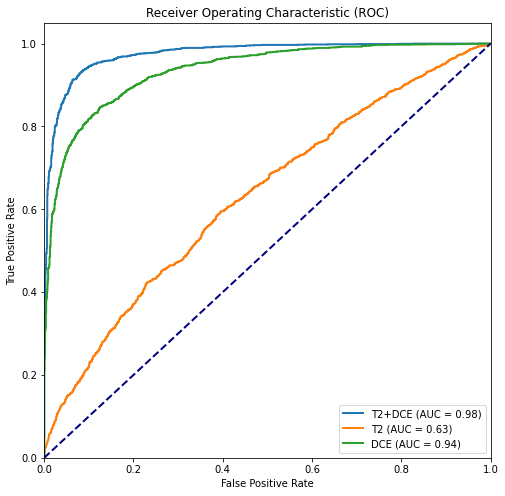

In [34]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

path= [r"F:\乳腺癌的简介结果数据\Resnet\testdataT2+DCE.csv",
      r"F:\乳腺癌的简介结果数据\Resnet\testdataT2.csv",
      r"F:\乳腺癌的简介结果数据\Resnet\testdataDCE.csv"]

def get_column_values(csv_file, column_index):
    values = []
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            values.append(row[column_index:])
    return values

label=[]
pro= []
Auc = []
acc = []
recall = []
Specificity = []
Ppv = []
Npv = []
for  t in path:
    column_index = 0  # 假设label列在第一列，索引为0
    column_values = get_column_values(t, column_index)
    label_= np.array(column_values[10][1:], dtype=np.float64)
    pro_= np.array(column_values[11][1:], dtype=np.float64)
    auc_ = np.array(column_values[0][1], dtype=np.float64)
    acc_ = np.array(column_values[8][1], dtype=np.float64)
    recall_ = np.array(column_values[1][1])
    Specificity_ = np.array(column_values[5][1], dtype=np.float64)
    Ppv_ = np.array(column_values[4][1])
    Npv_ = np.array(column_values[3][1], dtype=np.float64)

    label.append(label_)
    pro.append(pro_)
    Auc.append(auc_)
    acc.append(acc_)
    recall.append(recall_)
    Specificity.append(Specificity_)
    Ppv.append(Ppv_)
    Npv.append(Npv_)
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
 
# 生成七组概率和标签数据
probabilities = [
    pro[0],
    pro[1],
    pro[2]
]
 
labels = [
    label[0],
   label[1],
    label[2],
]
 
labels_name =['T2+DCE','T2','DCE']
 
# 绘制AUC曲线
plt.figure(figsize=(8, 8))
 
for i in range(len(labels)):
    fpr, tpr, _ = roc_curve(labels[i], probabilities[i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{labels_name[i]} (AUC = {roc_auc:.2f})')
 
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

# 95Cl的计算

In [35]:
import  math

def confidence_level(auc_value ,positive_samples ,negative_samples):
    # 置信水平
    confidence_level = 0.95
    Q1 = auc_value / (2 - auc_value)
    Q2 = (2 * auc_value ** 2) / (1 + auc_value)
    # 计算标准误差
    standard_error = math.sqrt((auc_value * (1 - auc_value) +
                                (positive_samples - 1) * (Q1 - auc_value ** 2) +
                                (negative_samples - 1) * (Q2 - auc_value ** 2))
                               / (positive_samples * negative_samples))

    # 根据置信水平计算Z分数
    z_score = 1.96  # 对于95%置信水平

    # 计算百分之九十五的置信区间
    lower_bound = auc_value - z_score * standard_error
    upper_bound = auc_value + z_score * standard_error

    print(f"95% Confidence Interval for AUC: {lower_bound:.2f} - {upper_bound:.2f}")

In [36]:
for b,i in enumerate(acc):
    print('='*10,'95% Confidence Interval for AUC of test model','='*10)
    print(f"{labels_name[b]}  auc {float(Auc[b].item()):.2f}")
    confidence_level(Auc[b],list(label[0]).count(0) ,list(label[0]).count(1))
    
    print('='*10,'95% Confidence Interval for ACC of test model','='*10)
    print(f"{labels_name[b]}  acc {float(acc[b].item()):.2f}")
    confidence_level(float(acc[b].item()),list(label[0]).count(0) ,list(label[0]).count(1))
    
    print('='*10,'95% Confidence Interval for recall of test model','='*10)
    print(f"{labels_name[b]}  recall {float(recall[b].item()):.2f}")
    confidence_level(float(recall[b].item()),list(label[0]).count(0) ,list(label[0]).count(1))
    
    print('='*10,'95% Confidence Interval for Specificity of test model','='*10)
    print(f"{labels_name[b]}  Specificity {float(Specificity[b].item()):.2f}")
    confidence_level(float(Specificity[b].item()),list(label[0]).count(0) ,list(label[0]).count(1))
                     
    print('='*10,'95% Confidence Interval for Ppv of test model','='*10)
    print(f"{labels_name[b]}  Ppv {float(Ppv[b].item()):.2f}")
    confidence_level(float(Ppv[b].item()),list(label[0]).count(0) ,list(label[0]).count(1))
                     
    print('='*10,'95% Confidence Interval for Npv of test model','='*10)
    print(f"{labels_name[b]}  Npv {float(Ppv[b].item()):.2f}")
    confidence_level(float(Npv[b].item()),list(label[0]).count(0) ,list(label[0]).count(1))                  
    

========== 95% Confidence Interval for AUC of test model ==========
T2+DCE  auc 0.98
95% Confidence Interval for AUC: 0.97 - 0.98
========== 95% Confidence Interval for ACC of test model ==========
T2+DCE  acc 0.92
95% Confidence Interval for AUC: 0.91 - 0.93
========== 95% Confidence Interval for recall of test model ==========
T2+DCE  recall 0.93
95% Confidence Interval for AUC: 0.92 - 0.94
========== 95% Confidence Interval for Specificity of test model ==========
T2+DCE  Specificity 0.92
95% Confidence Interval for AUC: 0.91 - 0.93
========== 95% Confidence Interval for Ppv of test model ==========
T2+DCE  Ppv 0.93
95% Confidence Interval for AUC: 0.93 - 0.94
========== 95% Confidence Interval for Npv of test model ==========
T2+DCE  Npv 0.93
95% Confidence Interval for AUC: 0.90 - 0.92
========== 95% Confidence Interval for AUC of test model ==========
T2  auc 0.63
95% Confidence Interval for AUC: 0.61 - 0.65
========== 95% Confidence Interval for ACC of test model ==========
T2  

### DDelong检验


In [37]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as st
from sklearn import metrics


class DelongTest():
    def __init__(self, preds1, preds2, label, threshold=0.05):
        '''
        preds1:the output of model1
        preds2:the output of model2
        label :the actual label
        '''
        self._preds1 = preds1
        self._preds2 = preds2
        self._label = label
        self.threshold = threshold
        self._show_result()

    def _auc(self, X, Y) -> float:
        return 1 / (len(X) * len(Y)) * sum([self._kernel(x, y) for x in X for y in Y])

    def _kernel(self, X, Y) -> float:
        '''
        Mann-Whitney statistic
        '''
        return .5 if Y == X else int(Y < X)

    def _structural_components(self, X, Y) -> list:
        V10 = [1 / len(Y) * sum([self._kernel(x, y) for y in Y]) for x in X]
        V01 = [1 / len(X) * sum([self._kernel(x, y) for x in X]) for y in Y]
        return V10, V01

    def _get_S_entry(self, V_A, V_B, auc_A, auc_B) -> float:
        return 1 / (len(V_A) - 1) * sum([(a - auc_A) * (b - auc_B) for a, b in zip(V_A, V_B)])

    def _z_score(self, var_A, var_B, covar_AB, auc_A, auc_B):
        return (auc_A - auc_B) / ((var_A + var_B - 2 * covar_AB) ** (.5) + 1e-8)

    def _group_preds_by_label(self, preds, actual) -> list:
        X = [p for (p, a) in zip(preds, actual) if a]
        Y = [p for (p, a) in zip(preds, actual) if not a]
        return X, Y

    def _compute_z_p(self):
        X_A, Y_A = self._group_preds_by_label(self._preds1, self._label)
        X_B, Y_B = self._group_preds_by_label(self._preds2, self._label)

        V_A10, V_A01 = self._structural_components(X_A, Y_A)
        V_B10, V_B01 = self._structural_components(X_B, Y_B)

        auc_A = self._auc(X_A, Y_A)
        auc_B = self._auc(X_B, Y_B)

        # Compute entries of covariance matrix S (covar_AB = covar_BA)
        var_A = (self._get_S_entry(V_A10, V_A10, auc_A, auc_A) * 1 / len(V_A10) + self._get_S_entry(V_A01, V_A01, auc_A,
                                                                                                    auc_A) * 1 / len(
            V_A01))
        var_B = (self._get_S_entry(V_B10, V_B10, auc_B, auc_B) * 1 / len(V_B10) + self._get_S_entry(V_B01, V_B01, auc_B,
                                                                                                    auc_B) * 1 / len(
            V_B01))
        covar_AB = (self._get_S_entry(V_A10, V_B10, auc_A, auc_B) * 1 / len(V_A10) + self._get_S_entry(V_A01, V_B01,
                                                                                                       auc_A,
                                                                                                       auc_B) * 1 / len(
            V_A01))

        # Two tailed test
        z = self._z_score(var_A, var_B, covar_AB, auc_A, auc_B)
        p = st.norm.sf(abs(z)) * 2

        return z, p

    def _show_result(self):
        z, p = self._compute_z_p()
        print(f"z score = {z:.5f};\np value = {p:.5f};")
        if p < self.threshold:
            print("There is a significant difference")
        else:
            print("There is NO significant difference")


In [38]:
model_T2_DCE = probabilities = pro[0]
 
model_T2 =  pro[1]

model_DCE =   pro[2]

# 创建对应的真实标签
true_labels = label[0]

print ('========'+'以下为test 数据中各个模型与（T2_DCE+T2+DCE）的对比'+'========'+'\n')
print('1 model_T2_DCE  vs model_T2 :')
DelongTest(model_T2_DCE  , model_T2 , true_labels )
print('- - -'*30)
print('2 model_T2_DCE vs model_DCE  :')
DelongTest(model_T2_DCE, model_DCE  , true_labels )
print('- - -'*30)
print('3 model_T2 vs model_DCE  :')
DelongTest(model_T2 , model_DCE  , true_labels )

========以下为test 数据中各个模型与（T2_DCE+T2+DCE）的对比========

1 model_T2_DCE  vs model_T2 :
z score = 37.01637;
p value = 0.00000;
There is a significant difference
- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -
2 model_T2_DCE vs model_DCE  :
z score = 12.00176;
p value = 0.00000;
There is a significant difference
- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -- - -
3 model_T2 vs model_DCE  :
z score = -29.95147;
p value = 0.00000;
There is a significant difference
